---
## **Training a Standard SVM Classifier**
---

<font size="2">Eudald Sangenis  
Creation: 7/12/2022  
Last Update: 7/18/2022  

The objective of this file is to train the standard SVM classifier with data from three different subjects.

Once this classifier is trained the next step is to predict the labels and verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Get the current working directory
current_directory = os.getcwd()

---
## **<font size="5">2. Parameters to modify</font>**
---

In [ ]:
type_dataset   = 'train'        # train, test
bias_dataset = True             # True - no bias dataset, False - biased dataset

<font size="2">Decide:  
* Mode 0: if you want to create a new classifier and train it.  
* Mode 1: if you want to import a classifier model and train with more data.  
* Mode 2: if you want to import a trained classifier.</font> 

In [4]:
training_mode = 0

<font size="2">If mode = 0 : SVM parameters:</font> 

In [5]:
svm_C = 100
svm_kernel = 'rbf'

<font size="2">Classifier path and name:</font> 

In [ ]:
# Folder classifier:
folder_clf = current_directory+'\\clf\\'
os.makedirs(folder_clf, exist_ok=True)
name_clf = 'standard_SVM_clf.sav'

---
## **<font size="5">3. Load Train Datasets</font>**
---

<font size="2">Load Dataset 2022/03/17:</font>

In [ ]:
data_dataset_1 = '2022_03_17'
data_dataset_2 = '2022_04_25'
data_dataset_3 = '2022_07_27'
data_dataset_4 = '2022_08_01'
num_df_to_train = 4

# Folder to read the labeled datasets:
dataset_path_1 = current_directory+'\\datasets\\'+data_dataset_1+'\\'
dataset_path_2 = current_directory+'\\datasets\\'+data_dataset_2+'\\'
dataset_path_3 = current_directory+'\\datasets\\'+data_dataset_3+'\\'
dataset_path_4 = current_directory+'\\datasets\\'+data_dataset_4+'\\'

print('Reading datasets ...')
# Load the HD dataset
if bias_dataset == False: 
    if num_df_to_train == 2:
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset+'.csv')

    if num_df_to_train == 3: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset+'.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset+'.csv')
    
    if num_df_to_train == 4: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset+'.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset+'.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset+'.csv')
        df_4 = pd.read_csv(dataset_path_4 + '6sig_'+type_dataset+'.csv')

if bias_dataset == True:
    if num_df_to_train == 2:
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset+'_no_Bias.csv')

    if num_df_to_train == 3: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset+'_no_Bias.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset+'_no_Bias.csv')
    
    if num_df_to_train == 4: 
        df_1 = pd.read_csv(dataset_path_1 + '6sig_'+type_dataset+'_no_Bias.csv')
        df_2 = pd.read_csv(dataset_path_2 + '6sig_'+type_dataset+'_no_Bias.csv')
        df_3 = pd.read_csv(dataset_path_3 + '6sig_'+type_dataset+'_no_Bias.csv')
        df_4 = pd.read_csv(dataset_path_4 + '6sig_'+type_dataset+'_no_Bias.csv')

print('Reading done!')

if 'Unnamed: 0' in df_1: df_1 = df_1.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0' in df_2: df_2 = df_2.drop(['Unnamed: 0'], axis=1)
if num_df_to_train == 3: 
    if 'Unnamed: 0' in df_3: df_3 = df_3.drop(['Unnamed: 0'], axis=1)
if num_df_to_train == 4: 
    if 'Unnamed: 0' in df_3: df_3 = df_3.drop(['Unnamed: 0'], axis=1)
    if 'Unnamed: 0' in df_4: df_4 = df_4.drop(['Unnamed: 0'], axis=1)
if num_df_to_train == 2: 
    df = pd.concat([df_1, df_2], axis=0)
if num_df_to_train == 3: 
    df = pd.concat([df_1, df_2, df_3], axis=0)
if num_df_to_train == 4: 
    df = pd.concat([df_1, df_2, df_3, df_4], axis=0)

df = df.reset_index().drop('index', axis=1)
del df_1, df_2
if num_df_to_train == 3: del df_3
if num_df_to_train == 4: del df_3, df_4

print('Shape concat dfs :')
print(df.shape)
df.head(3)

Reading datasets ...
Reading done!
Shape concat dfs :
(928936, 7)


,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,-0.000304,-0.000089,-0.001330,0.001553,-0.000371,0.000064,ZUPT
1,0.000560,-0.000475,-0.000502,0.001264,0.000055,0.000172,ZUPT
2,-0.000341,-0.000234,-0.000317,0.000598,0.000284,0.000180,ZUPT
3,-0.000778,-0.000976,0.000253,0.000378,0.000134,-0.000192,ZUPT
4,-0.000162,-0.001607,0.000593,0.000454,-0.000585,-0.000234,ZUPT
...,...,...,...,...,...,...,...
928931,-0.007086,0.021357,0.000183,0.000799,0.003901,0.001165,ZUPT
928932,-0.006356,0.024846,-0.002331,0.000607,0.002368,-0.000164,ZUPT
928933,-0.005572,0.022577,-0.005733,0.001411,0.001192,-0.001228,ZUPT
928934,-0.012380,0.023485,-0.002152,0.001345,0.002310,-0.000379,ZUPT


<AxesSubplot:>

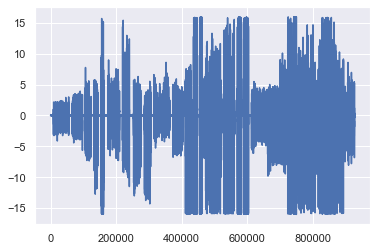

In [8]:
sns.set(font_scale = 1)
df['acc1'].plot()

---
## **<font size="5">4. Normalize data:</font>**
---

In [9]:
X = df.iloc[:,:-1]
X

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,-0.000304,-0.000089,-0.001330,0.001553,-0.000371,0.000064
1,0.000560,-0.000475,-0.000502,0.001264,0.000055,0.000172
2,-0.000341,-0.000234,-0.000317,0.000598,0.000284,0.000180
3,-0.000778,-0.000976,0.000253,0.000378,0.000134,-0.000192
4,-0.000162,-0.001607,0.000593,0.000454,-0.000585,-0.000234
...,...,...,...,...,...,...
928931,-0.007086,0.021357,0.000183,0.000799,0.003901,0.001165
928932,-0.006356,0.024846,-0.002331,0.000607,0.002368,-0.000164
928933,-0.005572,0.022577,-0.005733,0.001411,0.001192,-0.001228
928934,-0.012380,0.023485,-0.002152,0.001345,0.002310,-0.000379


In [10]:
scaler_train = StandardScaler()
scaler_train.fit(X)
X_norm = scaler_train.transform(X)
X_norm = pd.DataFrame(X_norm, columns = df.columns[:-1])
X_norm

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,0.169098,0.039957,0.124231,0.003665,0.007749,0.044048
1,0.169720,0.039598,0.124901,0.003495,0.007880,0.044131
2,0.169071,0.039822,0.125052,0.003104,0.007951,0.044137
3,0.168757,0.039132,0.125514,0.002975,0.007905,0.043852
4,0.169199,0.038546,0.125789,0.003020,0.007683,0.043820
...,...,...,...,...,...,...
928931,0.164218,0.059895,0.125457,0.003223,0.009065,0.044891
928932,0.164742,0.063138,0.123419,0.003110,0.008593,0.043874
928933,0.165307,0.061030,0.120661,0.003581,0.008231,0.043058
928934,0.160408,0.061873,0.123564,0.003543,0.008575,0.043709


In [11]:
X_norm['label'] = df['label']
X_norm

,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,0.169098,0.039957,0.124231,0.003665,0.007749,0.044048,ZUPT
1,0.169720,0.039598,0.124901,0.003495,0.007880,0.044131,ZUPT
2,0.169071,0.039822,0.125052,0.003104,0.007951,0.044137,ZUPT
3,0.168757,0.039132,0.125514,0.002975,0.007905,0.043852,ZUPT
4,0.169199,0.038546,0.125789,0.003020,0.007683,0.043820,ZUPT
...,...,...,...,...,...,...,...
928931,0.164218,0.059895,0.125457,0.003223,0.009065,0.044891,ZUPT
928932,0.164742,0.063138,0.123419,0.003110,0.008593,0.043874,ZUPT
928933,0.165307,0.061030,0.120661,0.003581,0.008231,0.043058,ZUPT
928934,0.160408,0.061873,0.123564,0.003543,0.008575,0.043709,ZUPT


---
## **<font size="5">5. Balance the Imbalanced Dataset</font>**
---

In [12]:
X_norm['label'].value_counts()

ZUPT                176279
walk_b_60           108675
walk_60              91834
walk_b_90            73823
walk_90              65203
slide_left           55310
slide_right          52465
ZUPT_walk_b_60       51414
ZUPT_walk_60         51246
jogg_120             46325
run_150              34870
ZUPT_walk_90         33387
sprint_180           30408
ZUPT_walk_b_90       16317
ZUPT_slide_right     13608
ZUPT_jogg_120        10333
ZUPT_slide_left      10316
ZUPT_run_150          4636
ZUPT_sprint_180       2487
Name: label, dtype: int64

Text(0.5, 1.0, '% of apperances each class on the dataset:')

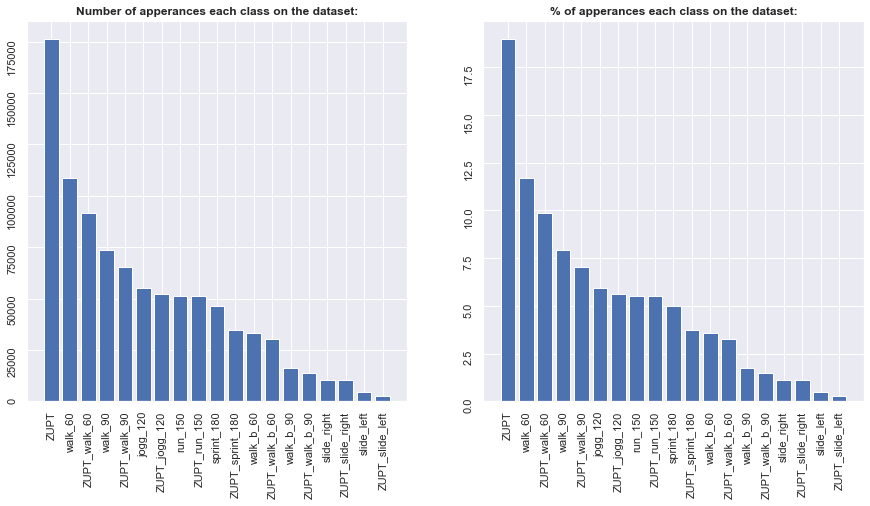

In [13]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(nrows=1, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.bar(X_norm['label'].unique(), X_norm['label'].value_counts()); 
ax0.tick_params(labelrotation=90)
ax0.set_title('Number of apperances each class on the dataset:', fontweight="bold")
ax1.bar(X_norm['label'].unique(), X_norm['label'].value_counts()/np.size(X_norm,0)*100); 
ax1.tick_params(labelrotation=90)
ax1.set_title('% of apperances each class on the dataset:', fontweight="bold")

In [14]:
# transform the dataset
X = X_norm.iloc[:,:-1]
y = X_norm['label']

y = y.replace(['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
               'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
               'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
               'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
               'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
               [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])


In [15]:
#strategy = {0:3000, 1:3000, 2:3000, 3:3000, 4:3000, 5:3000, 6:3000, 7:3000, 8:3000, 9:3000, 10:3000, 11:3000, 12:3000, 13:3000, 14:3000, 15:3000, 16:3000, 17:3000, 18:3000}
strategy = {0:12000, 1:12000, 2:12000, 3:12000, 4:12000, 5:12000, 6:12000, 7:12000, 8:12000, 9:12000, 10:12000, 11:12000, 12:12000, 13:12000, 14:12000, 15:12000, 16:12000, 17:12000, 18:12000}
#strategy = {0:20000, 1:20000, 2:20000, 3:20000, 4:20000, 5:20000, 6:20000, 7:20000, 8:20000, 9:20000, 10:20000, 11:20000, 12:20000, 13:20000, 14:20000, 15:20000, 16:20000, 17:20000, 18:20000}

# transform the dataset
over = SMOTE()
under = RandomUnderSampler(sampling_strategy=strategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X,y = pipeline.fit_resample(X, y)

In [16]:
df_balanced = pd.concat([X,pd.DataFrame(y,columns=['label'])], axis = 1)
df_balanced['label'] = df_balanced['label'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                                                    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
                                                    'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
                                                    'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
                                                    'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
                                                    'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']).to_numpy()
df_balanced['label'].value_counts()

ZUPT                12000
walk_60             12000
slide_right         12000
walk_b_90           12000
walk_b_60           12000
sprint_180          12000
run_150             12000
jogg_120            12000
walk_90             12000
ZUPT_slide_left     12000
ZUPT_walk_60        12000
ZUPT_slide_right    12000
ZUPT_walk_b_90      12000
ZUPT_walk_b_60      12000
ZUPT_sprint_180     12000
ZUPT_run_150        12000
ZUPT_jogg_120       12000
ZUPT_walk_90        12000
slide_left          12000
Name: label, dtype: int64

In [17]:
df_balanced.head(2)

,acc1,acc2,acc3,gyro1,gyro2,gyro3,label
0,0.169891,0.041240,0.125125,0.003467,0.007995,0.043820,ZUPT
1,0.169868,0.041639,0.128022,0.003836,0.007784,0.044098,ZUPT


---
## **<font size="5">7. Train Model:</font>**
---

In [18]:
X = df_balanced.iloc[:,:-1]
y = df_balanced.iloc[:,-1].replace(['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
                                    'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
                                    'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
                                    'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
                                    'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'],
                                    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [20]:
if training_mode == 0:
    print('Training...')
    support = svm.SVC(kernel = svm_kernel, C = svm_C)
    support.fit(x_train, y_train)
    print('Training done!')

    pickle.dump(support, open(folder_clf + name_clf, 'wb'))     # save the clf model
    print('Model saved!')

elif training_mode == 1:
    print('Retraining the classifier with more data...')
    support = pickle.load(open(folder_clf + name_clf2, 'rb'))    # read clf model
    support.fit(x_train, y_train)
    print('Retraining done!')

    pickle.dump(support, open(folder_clf + name_clf, 'wb'))     # save the clf model
    print('Model saved!')

else:
    support = pickle.load(open(folder_clf + name_clf, 'rb'))    # read clf model
    print('Classifier Loaded!')

print('Classifier Gamma: ' + str(support._gamma))

Training...
Training done!
Model saved!
Classifier Gamma: 0.16225850214984383


---
## **<font size="5">8. Prediction Test:</font>**
---

In [21]:
Y_predict = support.predict(x_test)

In [22]:
r2score_svm = 100*r2_score(y_test, Y_predict)
print('The r2score of the SVM is: {} %'.format(r2score_svm))

acc_svm = 100*accuracy_score(y_test, Y_predict)
print('The accuracy of the SVM is: {} %'.format(acc_svm))

The r2score of the SVM is: 56.76252572596299 %
The accuracy of the SVM is: 60.497807017543856 %


In [23]:
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.52      0.95      0.67      2405
           1       0.39      0.56      0.46      2354
           2       0.32      0.36      0.34      2327
           3       0.37      0.62      0.46      2347
           4       0.55      0.51      0.53      2424
           5       0.74      0.59      0.66      2401
           6       0.41      0.45      0.43      2413
           7       0.51      0.39      0.44      2484
           8       0.45      0.45      0.45      2451
           9       0.65      0.57      0.61      2344
          10       0.70      0.63      0.67      2411
          11       0.79      0.66      0.72      2445
          12       0.79      0.69      0.74      2438
          13       0.83      0.70      0.76      2356
          14       0.86      0.63      0.72      2428
          15       0.67      0.68      0.67      2353
          16       0.83      0.52      0.64      2413
          17       0.91    

In [24]:
y_test

79344      6
73067      6
95059      7
49525      4
4271       0
          ..
78219      6
125475    10
214470    17
219230    18
213406    17
Name: label, Length: 45600, dtype: int64

In [25]:
Y_predict

array([ 6,  6,  7, ...,  7, 18, 17], dtype=int64)

In [26]:
X_test = pd.concat([x_test.reset_index().drop('index', axis = 1), y_test.reset_index().drop('index', axis = 1), pd.DataFrame(Y_predict)], axis = 1)

X_test.columns = ['acc1','acc2','acc3','gyro1','gyro2','gyro3','true_l','predicted_l']

print('X test with true and predicted label:')
X_test

X test with true and predicted label:


,acc1,acc2,acc3,gyro1,gyro2,gyro3,true_l,predicted_l
0,0.164494,0.035962,0.110840,0.007832,0.028964,0.052187,6,6
1,0.108274,0.022105,0.115236,0.035085,0.031362,0.001236,6,6
2,0.000584,0.039558,0.054836,-0.049334,0.114096,0.070676,7,7
3,-0.189631,0.107985,-0.239804,-0.026340,-0.201364,0.003160,4,4
4,0.162619,0.049740,0.120434,0.004220,0.007535,0.042388,0,0
...,...,...,...,...,...,...,...,...
45595,0.137293,0.052125,0.082151,0.086555,0.028085,0.043459,6,6
45596,-0.495184,0.177087,0.722425,0.170961,-0.245649,-0.049916,10,10
45597,0.201945,0.059467,0.142513,0.005715,0.098735,0.084950,17,7
45598,-0.160097,0.427018,-0.357641,2.599201,0.645453,0.559401,18,18


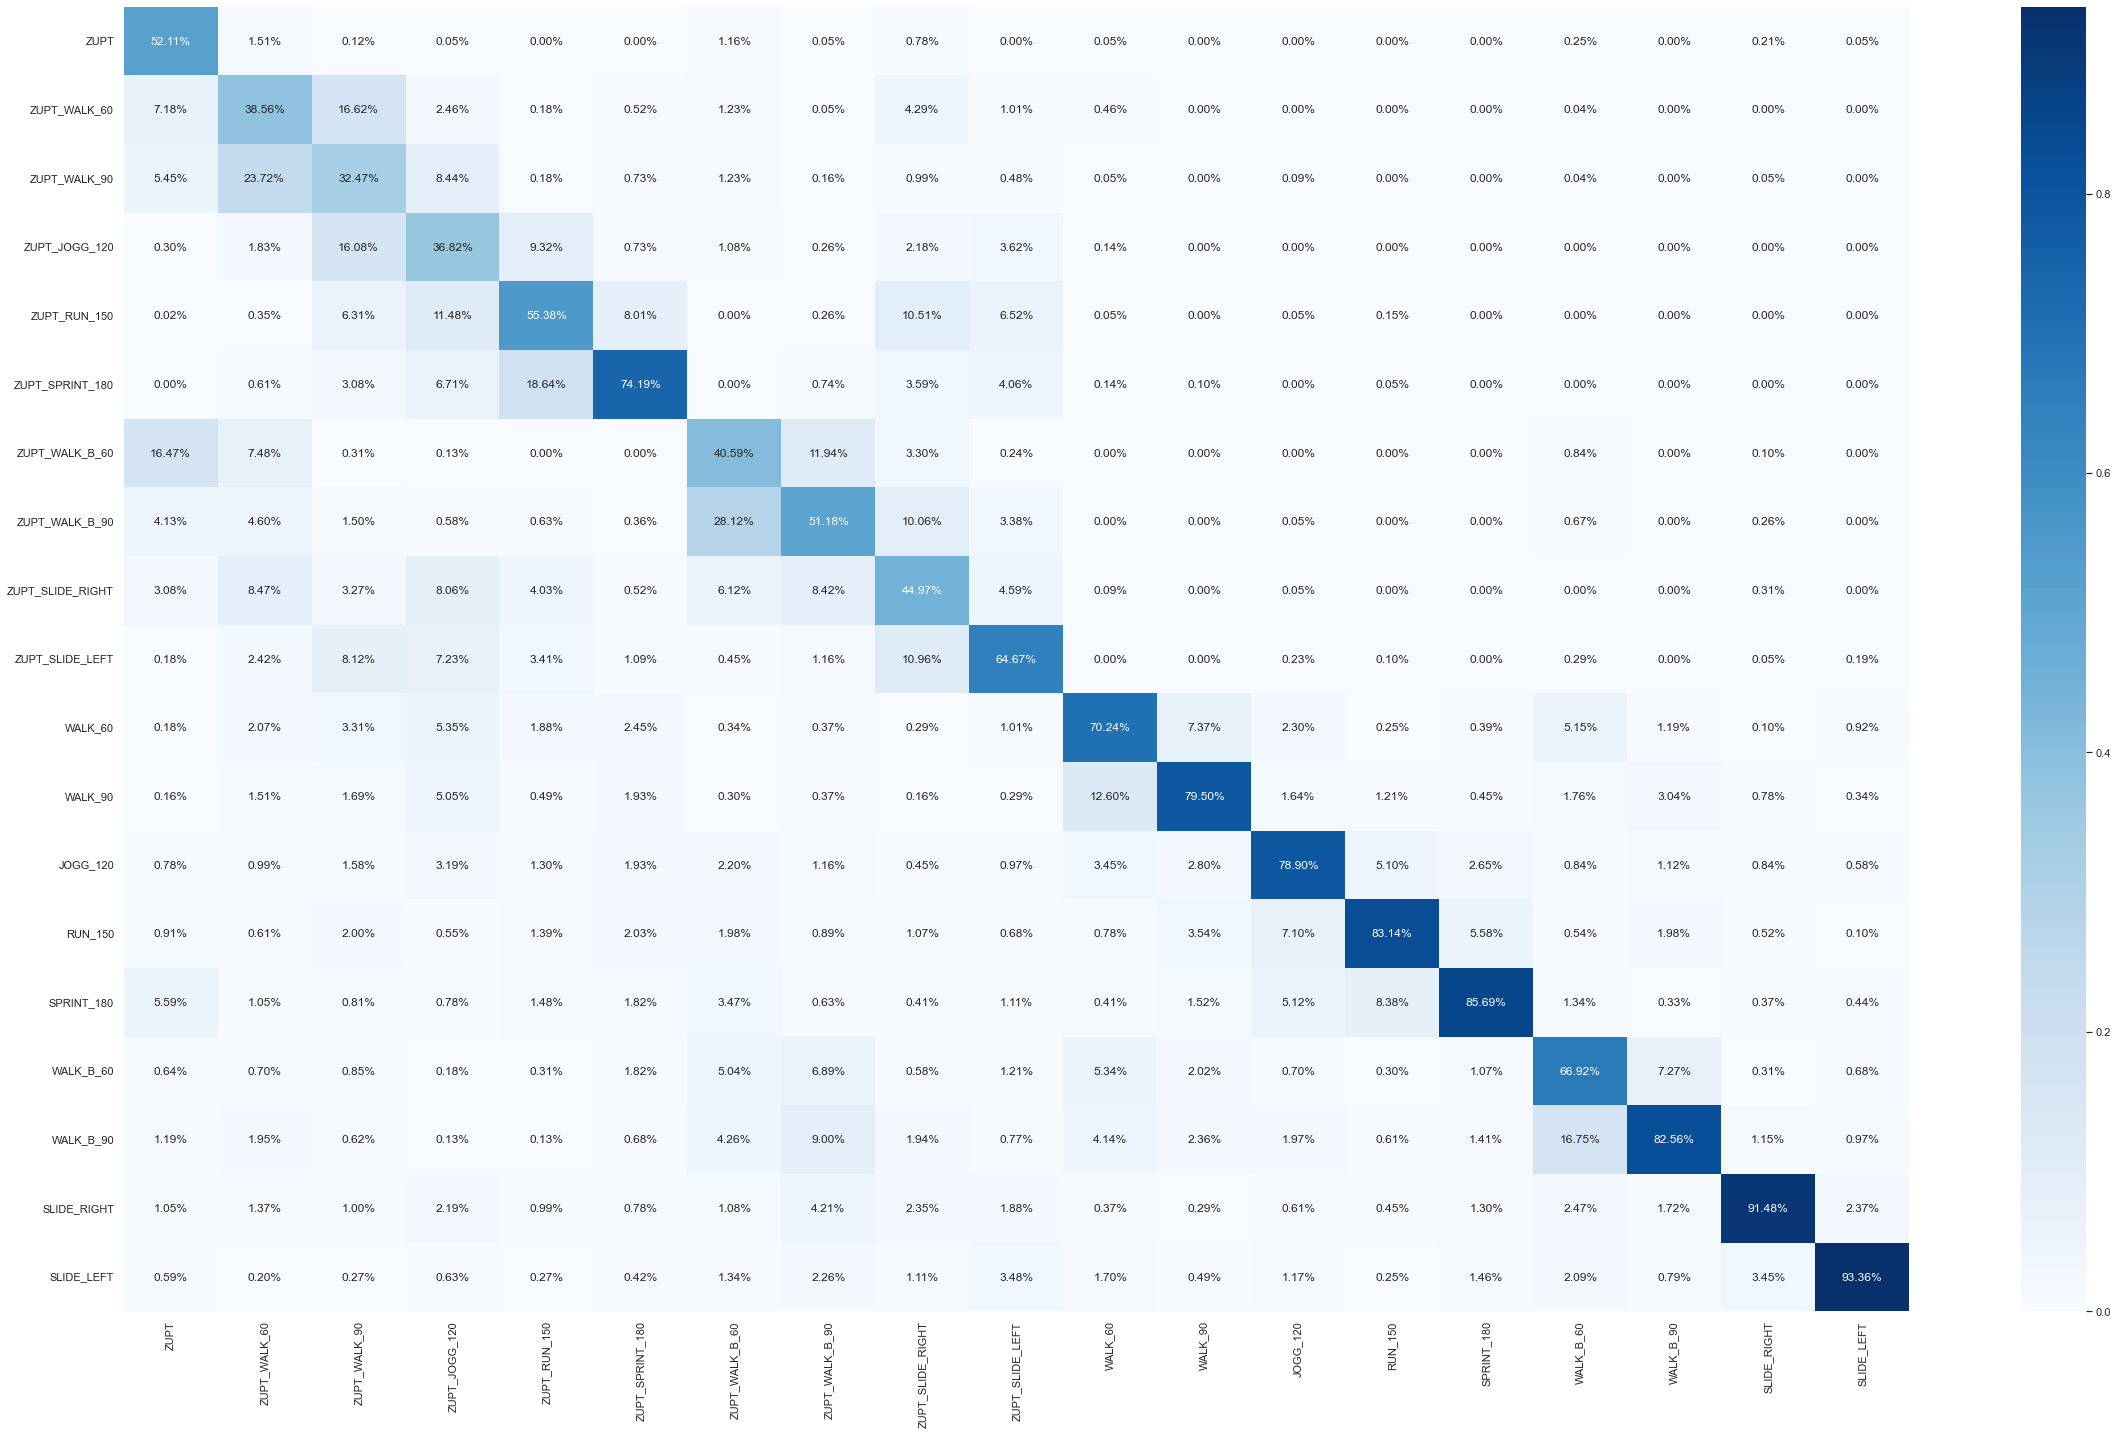

In [27]:
X_test.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

labels = ['ZUPT','ZUPT_walk_60','ZUPT_walk_90',
          'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
          'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
          'ZUPT_slide_left','walk_60','walk_90','jogg_120','run_150',
          'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left']

CM_SVM = confusion_matrix(X_test.loc[:,"true_l"], X_test.loc[:,"predicted_l"], labels=labels)

CM_SVM = pd.DataFrame(CM_SVM, index=labels)

sns.set(rc = {'figure.figsize':(40,24)})
axis_labels = ['ZUPT','ZUPT_WALK_60','ZUPT_WALK_90','ZUPT_JOGG_120','ZUPT_RUN_150','ZUPT_SPRINT_180',
               'ZUPT_WALK_B_60','ZUPT_WALK_B_90','ZUPT_SLIDE_RIGHT','ZUPT_SLIDE_LEFT',
               'WALK_60','WALK_90','JOGG_120','RUN_150','SPRINT_180','WALK_B_60',
               'WALK_B_90','SLIDE_RIGHT','SLIDE_LEFT']

sns.heatmap(CM_SVM/np.sum(CM_SVM),annot=True, fmt='.2%', cmap='Blues', xticklabels=axis_labels, yticklabels=axis_labels)
plt.show()

---
## **<font size="5">8. Visualization test data HD dataset data using t-sne:</font>**
---

In [28]:
X_test

,acc1,acc2,acc3,gyro1,gyro2,gyro3,true_l,predicted_l
0,0.164494,0.035962,0.110840,0.007832,0.028964,0.052187,ZUPT_walk_b_60,ZUPT_walk_b_60
1,0.108274,0.022105,0.115236,0.035085,0.031362,0.001236,ZUPT_walk_b_60,ZUPT_walk_b_60
2,0.000584,0.039558,0.054836,-0.049334,0.114096,0.070676,ZUPT_walk_b_90,ZUPT_walk_b_90
3,-0.189631,0.107985,-0.239804,-0.026340,-0.201364,0.003160,ZUPT_run_150,ZUPT_run_150
4,0.162619,0.049740,0.120434,0.004220,0.007535,0.042388,ZUPT,ZUPT
...,...,...,...,...,...,...,...,...
45595,0.137293,0.052125,0.082151,0.086555,0.028085,0.043459,ZUPT_walk_b_60,ZUPT_walk_b_60
45596,-0.495184,0.177087,0.722425,0.170961,-0.245649,-0.049916,walk_60,walk_60
45597,0.201945,0.059467,0.142513,0.005715,0.098735,0.084950,slide_right,ZUPT_walk_b_90
45598,-0.160097,0.427018,-0.357641,2.599201,0.645453,0.559401,slide_left,slide_left


In [29]:
X_test_act = pd.DataFrame()
X_test_act = X_test
X_test_act.loc[:,"true_l"] = X_test.loc[:,"true_l"].replace(
    ['ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left'],
    ['walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test_act.loc[:,"predicted_l"] = X_test.loc[:,"predicted_l"].replace(
    ['ZUPT_walk_60','ZUPT_walk_90',
     'ZUPT_jogg_120','ZUPT_run_150','ZUPT_sprint_180',
     'ZUPT_walk_b_60','ZUPT_walk_b_90','ZUPT_slide_right',
     'ZUPT_slide_left'],
    ['walk_60','walk_90','jogg_120','run_150',
     'sprint_180','walk_b_60','walk_b_90','slide_right','slide_left'])

X_test_act

,acc1,acc2,acc3,gyro1,gyro2,gyro3,true_l,predicted_l
0,0.164494,0.035962,0.110840,0.007832,0.028964,0.052187,walk_b_60,walk_b_60
1,0.108274,0.022105,0.115236,0.035085,0.031362,0.001236,walk_b_60,walk_b_60
2,0.000584,0.039558,0.054836,-0.049334,0.114096,0.070676,walk_b_90,walk_b_90
3,-0.189631,0.107985,-0.239804,-0.026340,-0.201364,0.003160,run_150,run_150
4,0.162619,0.049740,0.120434,0.004220,0.007535,0.042388,ZUPT,ZUPT
...,...,...,...,...,...,...,...,...
45595,0.137293,0.052125,0.082151,0.086555,0.028085,0.043459,walk_b_60,walk_b_60
45596,-0.495184,0.177087,0.722425,0.170961,-0.245649,-0.049916,walk_60,walk_60
45597,0.201945,0.059467,0.142513,0.005715,0.098735,0.084950,slide_right,walk_b_90
45598,-0.160097,0.427018,-0.357641,2.599201,0.645453,0.559401,slide_left,slide_left


In [30]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne_ = TSNE(n_components=2, verbose=1, random_state=123)
tsne_ = tsne_.fit_transform(X_test_act.iloc[:,0:6])

c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Eudald\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45600 samples in 0.024s...
[t-SNE] Computed neighbors for 45600 samples in 3.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45600
[t-SNE] Computed conditional probabilities for sample 2000 / 45600
[t-SNE] Computed conditional probabilities for sample 3000 / 45600
[t-SNE] Computed conditional probabilities for sample 4000 / 45600
[t-SNE] Computed conditional probabilities for sample 5000 / 45600
[t-SNE] Computed conditional probabilities for sample 6000 / 45600
[t-SNE] Computed conditional probabilities for sample 7000 / 45600
[t-SNE] Computed conditional probabilities for sample 8000 / 45600
[t-SNE] Computed conditional probabilities for sample 9000 / 45600
[t-SNE] Computed conditional probabilities for sample 10000 / 45600
[t-SNE] Computed conditional probabilities for sample 11000 / 45600
[t-SNE] Computed conditional probabilities for sample 12000 / 45600
[t-SNE] Computed conditional probabilities for sam

In [31]:
df_ = pd.DataFrame()
df_["label"] = X_test_act.iloc[:,7]
df_["comp-1"] = tsne_[:,0]
df_["comp-2"] = tsne_[:,1]
df_.head(2)

,label,comp-1,comp-2
0,walk_b_60,-40.271076,-17.642220
1,walk_b_60,-23.931671,-25.765604


[Text(0.5, 1.0, 'T-SNE Projection Magnitude 6sig:')]

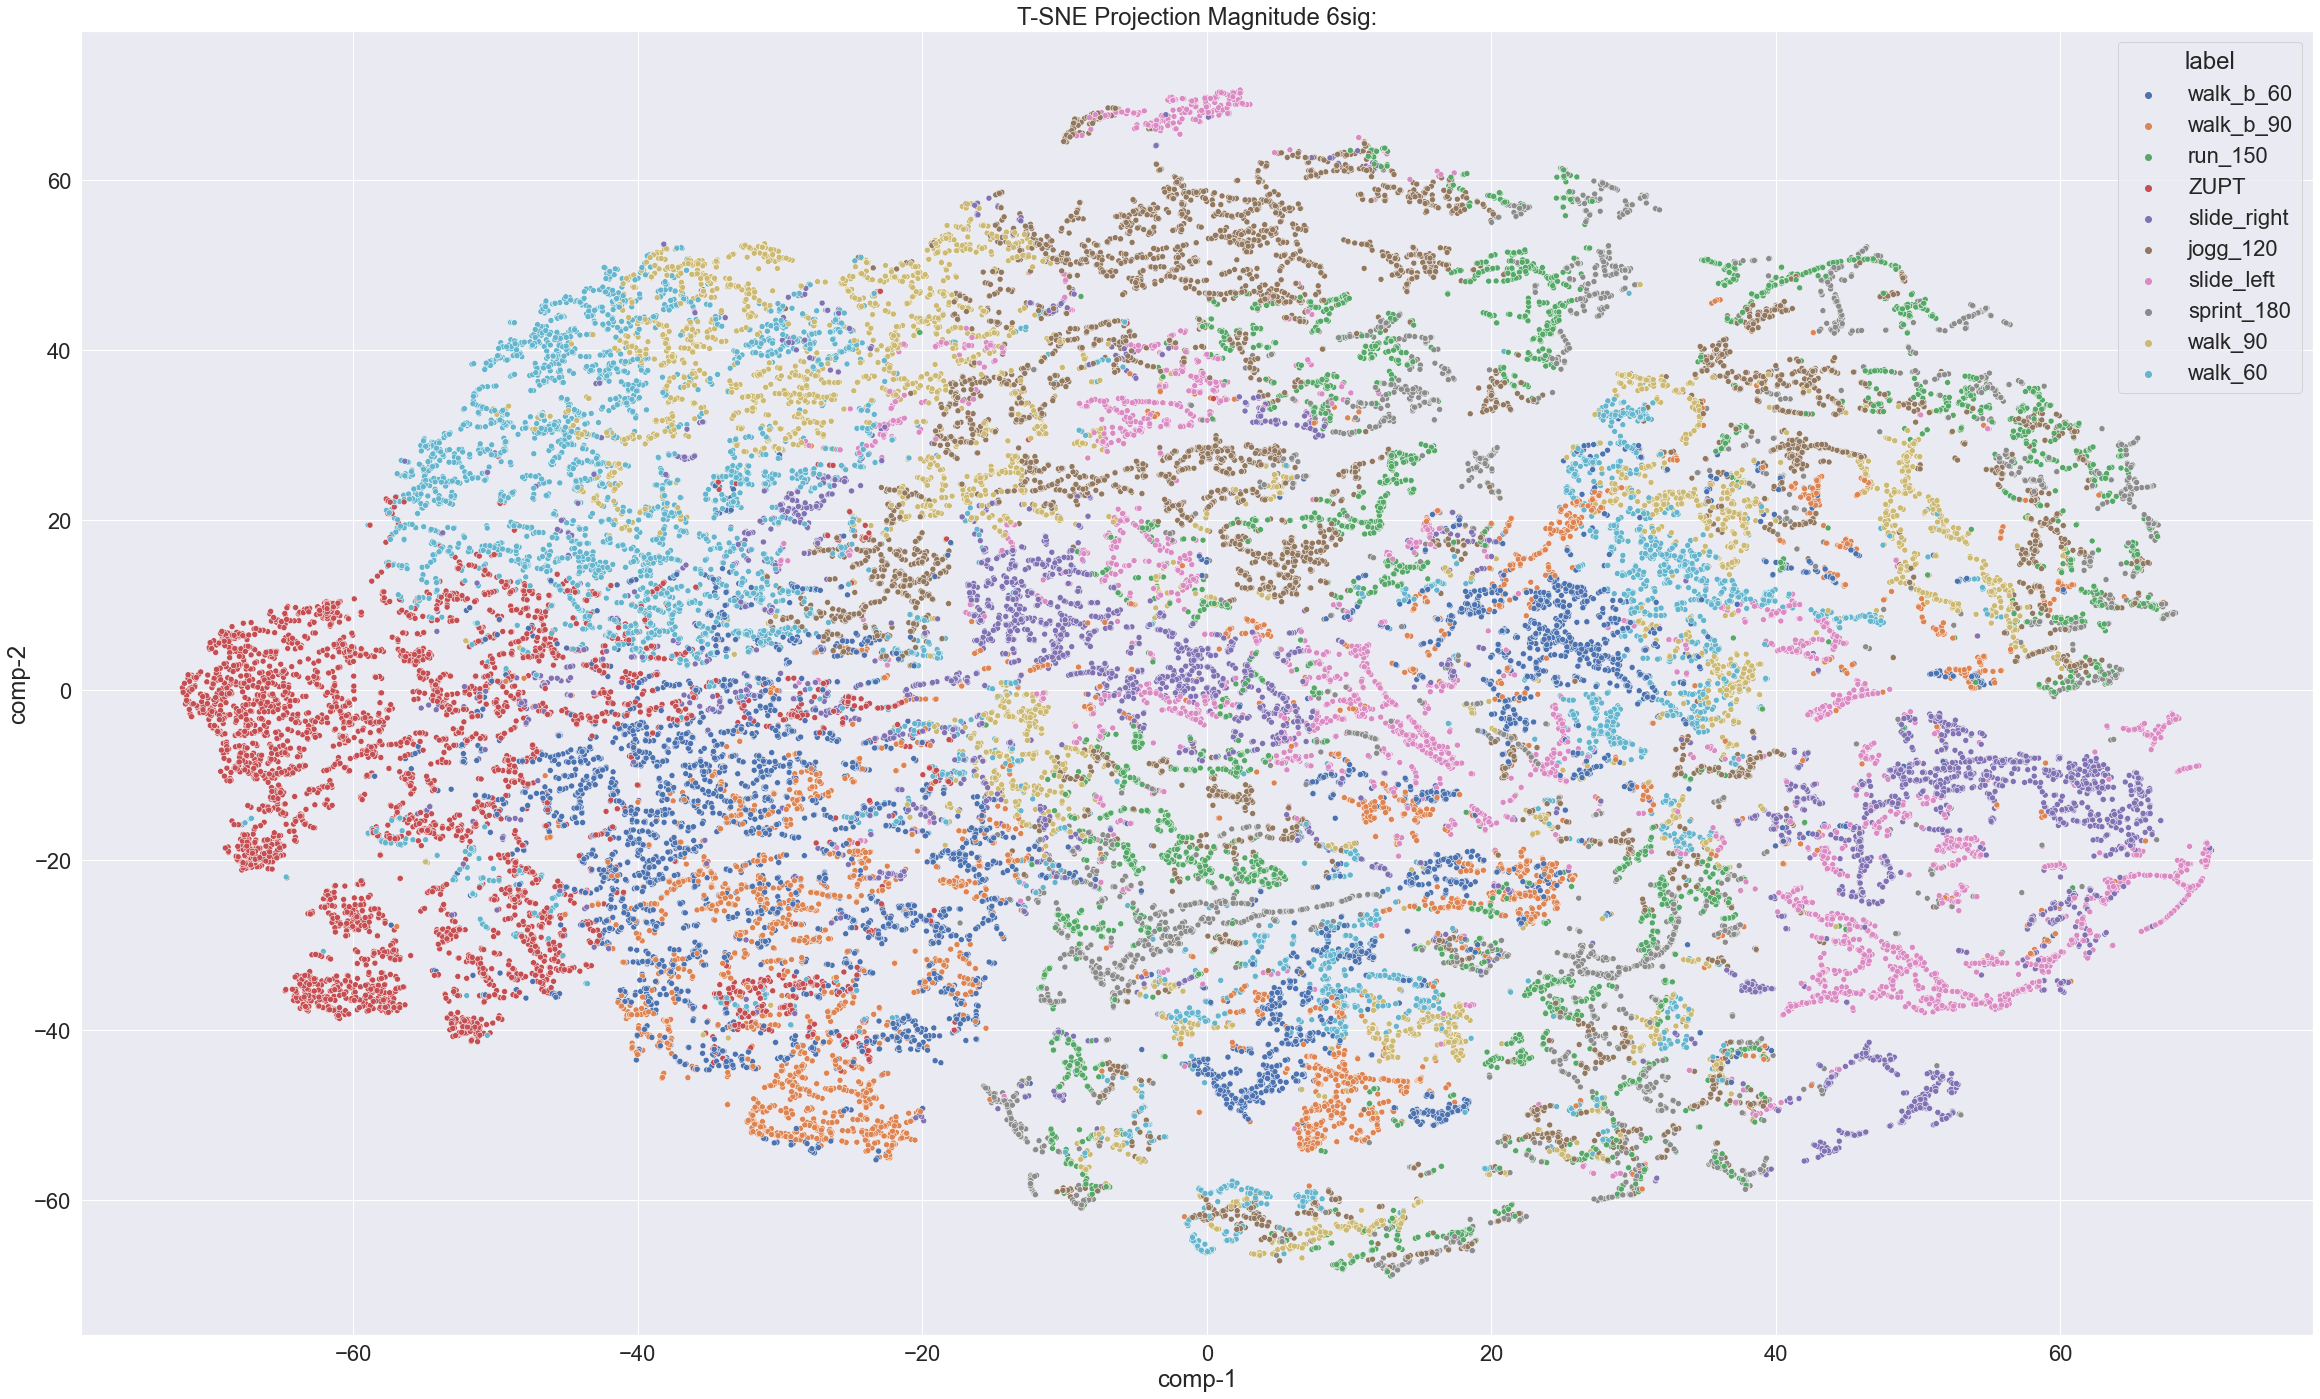

In [32]:
sns.set(font_scale = 2)
sns.scatterplot(x="comp-1", y="comp-2", hue="label", data=df_).set(title="T-SNE Projection Magnitude 6sig:")